
| <h1> Hands-on Activity 4.1 </h1> | <h1> Advanced Data Analytics and Machine Learning </h1> |
|--- | --- |
Name: Buan, Danilo Jr. G. <br>
Course and Section: CPE019S3 <br>
Date Submitted: 02/21/23 <br>
Instructor: Engr. Roman M. Richard
Date Performed: 02/21/24


# ***Part 1***

* Part 1 - **Import** the libraries and data
* Part 2 - **Plot** the Data
* Part 3 - **Perform Simple Linear Reggression** on the SURVIVAL feature column.

In [ ]:
#Importing the data and libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

trainingtitan = pd.read_csv("/content/titanic_train.csv")
testingtitan = pd.read_csv("/content/titanic_test.csv")

In [ ]:
trainingtitan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
testingtitan.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


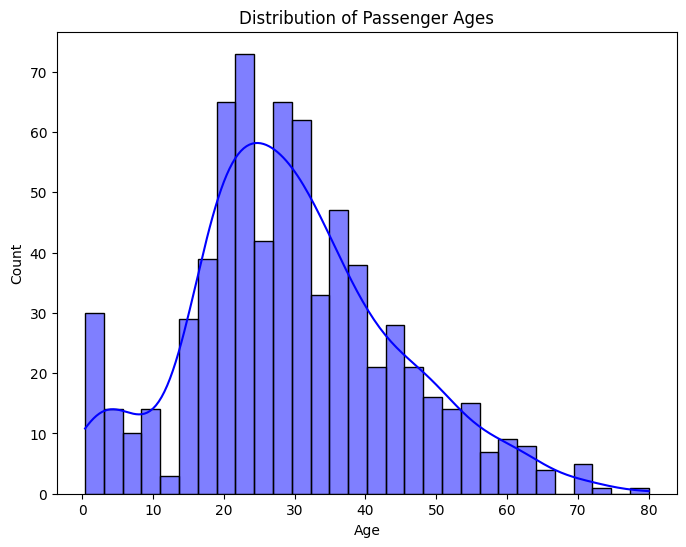

<ipython-input-5-bda62138f8b0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trainingtitan, x='Pclass', palette='viridis')


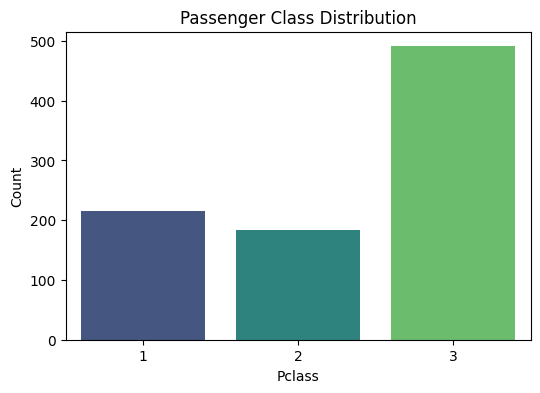

<ipython-input-5-bda62138f8b0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trainingtitan, x='Survived', palette='Set1')


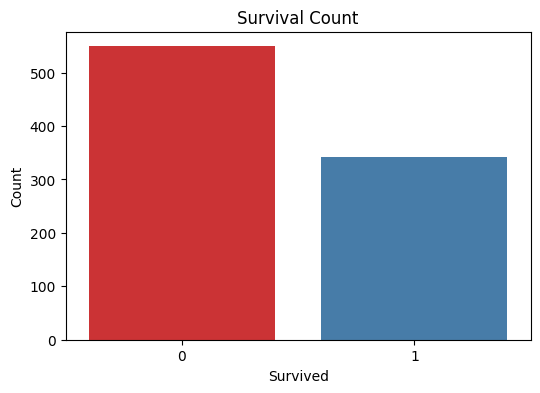

In [ ]:
#Plot the data
plt.figure(figsize=(8, 6))
sns.histplot(trainingtitan['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# Visualize passenger class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=trainingtitan, x='Pclass', palette='viridis')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()
# Visualize survival count
plt.figure(figsize=(6, 4))
sns.countplot(data=trainingtitan, x='Survived', palette='Set1')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [ ]:
#Perform Simple Linear Regression

data = trainingtitan[['Age', 'Fare']].dropna()
# Split the data into X and y
X = data[['Age']]
y = data['Fare']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 4147.43
R-squared: 0.00


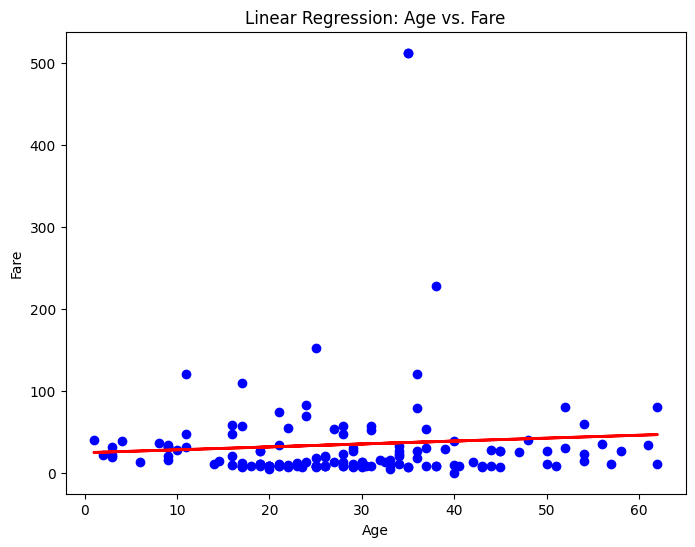

In [ ]:
# Visualize the linear regression line

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# ***Part 2***

#Part 1: Create a Decision Tree Classifier

Question: With the given data table above, what kinds of questions can we ask about the factors that contributed to passengers surviving or perishing in the Titanic disaster?



Step 1: Create the dataframe

In [ ]:
import pandas as pd

trainingtitan = pd.read_csv("/content/titanic_train.csv")

In [ ]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
#training.?

trainingtitan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Are there missing values in the data set?

* As displayed above, the value should be equal to 891. Other data such as Age, Cabin, and Embarked is not equal to 891 so it has missing values.

In [ ]:
#Code cell 3
#view the first few rows of the data
trainingtitan.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Step 2: Prepare the Data for the Decision Tree Model

In [ ]:
print(trainingtitan.columns)
#code cell 4
trainingtitan["Sex"] = trainingtitan["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#code cell 5
trainingtitan.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#code cell 6
trainingtitan["Age"].fillna(trainingtitan["Age"].mean(), inplace=True)

In [ ]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
missing_age_count = trainingtitan["Age"].isna().sum()
print("No. of missing values in 'Age' column: ", missing_age_count)

No. of missing values in 'Age' column:  0


What is the value that was used to replace the missing ages?

In [ ]:
#use code to answer the question above
trainingtitan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


Observation: Age column has 891 values meaning, the missing values earlier was replaced by a float64 datatype.

Step 3: Train and Score the Decision Tree Model

In [ ]:
#code cell 8
#create the array for the target values
y_target = trainingtitan["Survived"].values

In [ ]:
#code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = trainingtitan[list(columns)].values

In [ ]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree
#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [ ]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894

Step 6: Visualize the Tree

In [ ]:
#code cell 12

from sklearn.tree import export_graphviz
# Specify the path and filename for the DOT file
dot_file_path = "/content/titanic.dot"
# Export the decision tree as a DOT file
with open(dot_file_path, 'w') as f:
    f = export_graphviz(clf_train, out_file=f, feature_names=columns)

In [ ]:
!apt-get install graphviz #Done

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng /content/titanic.dot -o /content/titanic.png

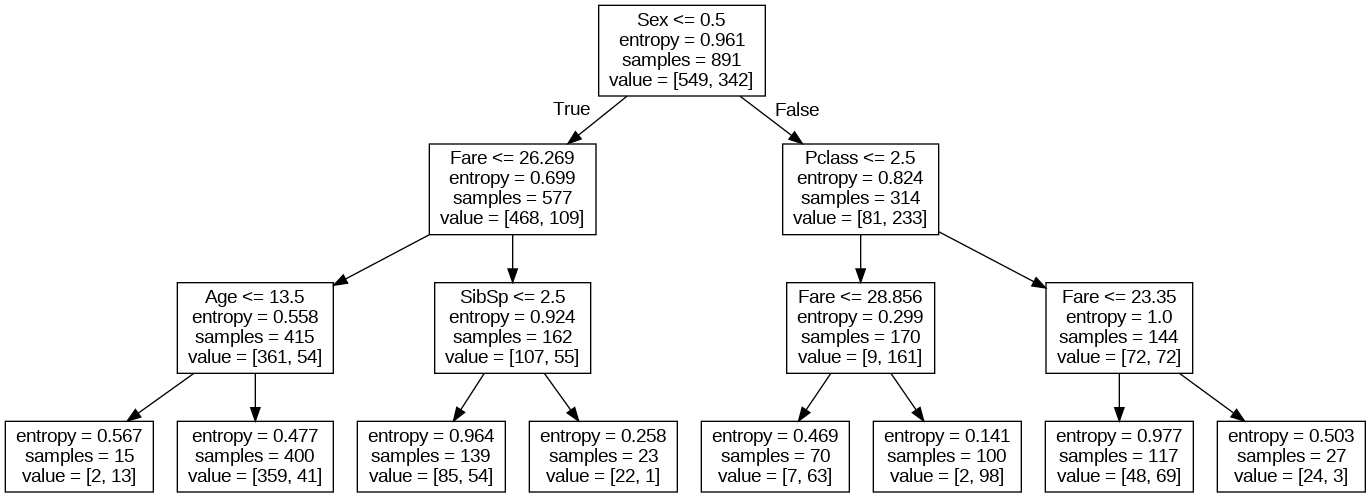

In [ ]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image
#display the decison tree graphic
Image(filename = "/content/titanic.png")

What describes the group that had the most deaths by number? Which group had the most survivors?
* The group that had the most deaths was Men, and the the group that had the most survivors was Age > 13.5.

#Part 2: Apply the Decision Tree Model


Step 1: Import and Prepare the Data

In [ ]:
import pandas as pd
#code cell 15
#import the file into the 'testing' dataframe.
testingtitan = pd.read_csv("/content/titanic_test.csv")


How many records are in the data set?

* 418, as seen on the code that is executed below.

Which important variables(s) are missing values and how many are missing?

* The variables that are missing is Age = 86, Fare = 1, Cabin = 327, with a data type of integer, as seen on the code executed below.

In [ ]:
# Get the number of records (rows) in the DataFrame
num_records = testingtitan.shape[0]
# Print the number of records
print("Number of records in the dataset:", num_records)

Number of records in the dataset: 418


In [ ]:
# Check for missing values and count them for each column
missing_values = testingtitan.isna().sum()
# Filter for columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
# Display the columns with missing values and the number of missing values
print("Columns with missing values:")
print(columns_with_missing_values)


Columns with missing values:
Age       86
Fare       1
Cabin    327
dtype: int64


In [ ]:
#code cell 16
#replace the Gender labels in the testing dataframe
# Hint: look at code cell 4
testingtitan["Sex"] = testingtitan["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [ ]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.
testingtitan["Age"].fillna(testingtitan["Age"].mean(), inplace=True)

In [ ]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head
#methods from here, by entering and running one and then the other.
print(testingtitan.info())
print(testingtitan.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB
None
   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, 

Step 2: Label the testing dataset

In [ ]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testingtitan[list(columns)].values

In [ ]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object
target_labels = clf_train.predict(X_input)
#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testingtitan['Name']})
#display the first few rows of the data set
print(target_labels.head())

   Est_Survival                                          Name
0             0                              Kelly, Mr. James
1             1              Wilkes, Mrs. James (Ellen Needs)
2             0                     Myles, Mr. Thomas Francis
3             0                              Wirz, Mr. Albert
4             1  Hirvonen, Mrs. Alexander (Helga E Lindqvist)


In [46]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("/content/titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result
print("Accuracy: ", acc)

Accuracy:  0.7682619647355163


#***Part 3: Evaluate the Decision Tree Model***

*Step 1: Import the data*

In [48]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify thelist of columns to import.
all_data = pd.read_csv("/content/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB
None


How many records are in the data set?

* As shown above, there are 1308 records based on the non-null count column.

Which important variables(s) are missing values and how many are missing?

* The variable that is missing values is Age, which is missing 263 values.

*Step 2: Prepare the data.*

In [49]:
#code cell 23
#Label the gender variable with 0 and 1
all_data['Gender'] = all_data['Gender'].replace({'male': 0, 'female': 1})

In [50]:
#code cell 24
#replace missing Age values with the mean age
mean_age = all_data['Age'].mean()
all_data['Age'].fillna(mean_age, inplace=True)
#display the first few rows of the data set
print(all_data.head())

   Survived  Pclass  Gender      Age  SibSp      Fare
0         1       1       1  29.0000      0  211.3375
1         1       1       0   0.9167      1  151.5500
2         0       1       1   2.0000      1  151.5500
3         0       1       0  30.0000      1  151.5500
4         0       1       1  25.0000      1  151.5500


*Step 2: Create the input and output variables for the training and testing data.

In [54]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split
input_columns = ['Pclass', 'Gender', 'Age', 'SibSp', 'Fare']
#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[input_columns].values
y = all_data["Survived"].values
#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [55]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [56]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))
#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


#Summary

* In this activity, we were able to create a decision tree classification, learned how to apply a decision tree model, and how to evaluate and analyze the decision tree model. With the help of the given document, we were able to follow the steps and understand what we were doing. We also learned how to visualize the decision tree using Graphiz which is an open source graph visualization software. Lastly, we were able to discover that females were most likely to survive in the Titanic incident.

#Conclusion

* In conclusion to this activity, it provided us new knowledge about the use of the decision tree classification, how we can process the data, how we can create and train the model, and how we can evaluate it. This activity demonstrated the endless possibilites in machine learning algorithms in extracting patterns from data and making close to accurate predictions.

#Observation

* For this activity, I have observed that the application of the decision tree classification on the titanic dataset is very helpful in gathering information for predicting the survival of passengers.